# Audio data augmentation tutorial

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensein/senselab/blob/main/tutorials/audio/audio_data_augmentation.ipynb)


In this tutorial, we will explore how to augment audio data using both the `audiomentations` and `torch_audiomentations` libraries in combination with the `senselab` package. Data augmentation helps create variations of audio data and can be used, for example to improve the robustness of machine learning models by simulating different real-world conditions.

First, we should install senselab if it has not already been installed.

In [1]:
%pip install senselab

Note: you may need to restart the kernel to use updated packages.


Now, we start by importing the modules required for the augmentation, plotting, and audio processing tasks.

In [2]:
# import all necessary modules
import os

from audiomentations import Compose as AudiomentationsCompose
from audiomentations import Gain as AudiomentationsGain
from torch_audiomentations import Compose as TorchAudiomentationsCompose
from torch_audiomentations import Gain as TorchAudiomentationsGain

from senselab.audio.data_structures import Audio
from senselab.audio.tasks.data_augmentation import augment_audios
from senselab.audio.tasks.plotting import play_audio, plot_waveform

# The following line after the first time senselab is imported is necessary to display plots inline in Jupyter notebooks
%matplotlib inline

Now, we define the augmentations that we will apply. We will create one augmentation pipeline using the `audiomentations` library and another using the `torch_audiomentations` library.

In this example, we will apply a simple `Gain` augmentation, which increases the volumne of the audio.
- `min_gain_in_db` and `max_gain_in_db` specify the range of gain (in decibels) to apply to the audio.
- p=1.0 ensures that the transformation is applied 100% of the time.

In [3]:
# Define augmentation
augment = AudiomentationsCompose([
    AudiomentationsGain(min_gain_db=14.99, max_gain_db=15, p=1.0)
    ])

# Define torch-based augmentation
torch_augment = TorchAudiomentationsCompose([
    TorchAudiomentationsGain(min_gain_in_db=14.99, max_gain_in_db=15, p=1.0)
    ])

/Users/fabiocat/Library/Caches/pypoetry/virtualenvs/senselab-KP8v1V64-py3.12/lib/python3.12/site-packages/torch_audiomentations/core/transforms_interface.py:76: FutureWarning: Transforms now expect an `output_type` argument that currently defaults to 'tensor', will default to 'dict' in v0.12, and will be removed in v0.13. Make sure to update your code to something like:
  >>> augment = Gain(..., output_type='dict')
  >>> augmented_samples = augment(samples).samples
  warnings.warn(
/Users/fabiocat/Library/Caches/pypoetry/virtualenvs/senselab-KP8v1V64-py3.12/lib/python3.12/site-packages/torch_audiomentations/core/composition.py:42: FutureWarning: Transforms now expect an `output_type` argument that currently defaults to 'tensor', will default to 'dict' in v0.12, and will be removed in v0.13. Make sure to update your code to something like:
  >>> augment = Compose(..., output_type='dict')
  >>> augmented_samples = augment(samples).samples
  warnings.warn(


Next, we load an audio file and perform basic analysis by playing the audio and visualizing its waveform.

--2025-09-15 19:27:53--  https://github.com/sensein/senselab/raw/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sensein/senselab/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav [following]
--2025-09-15 19:27:53--  https://raw.githubusercontent.com/sensein/senselab/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 472488 (461K) [audio/wav]
Saving to: ‘tutorial_audio_files/audio_48khz_mono_16bits.wav’

tutorial_audio_file 100%[===================>] 461.41K  --.-KB/s   

/Users/fabiocat/git/senselab/src/senselab/audio/data_structures/audio.py:183: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  info = torchaudio.info(filepath)
/Users/fabiocat/Library/Caches/pypoetry/virtualenvs/senselab-KP8v1V64-py3.12/lib/python3.12/site-packages/torchaudio/_backend/soundfile_backend.py:120: UserWarning: torchaudio._backend.common.AudioMetaData has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pyt

<Figure size 640x480 with 0 Axes>

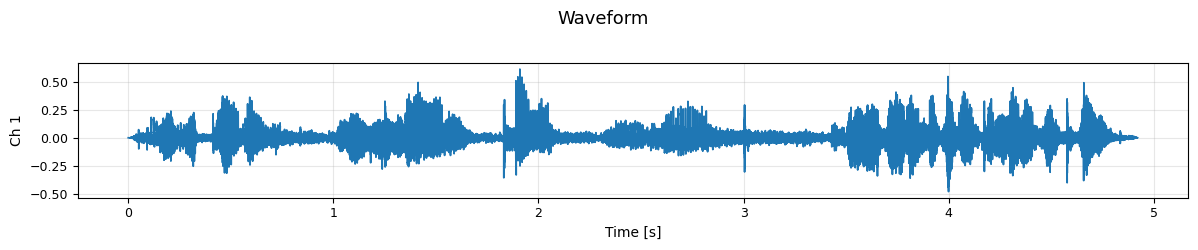

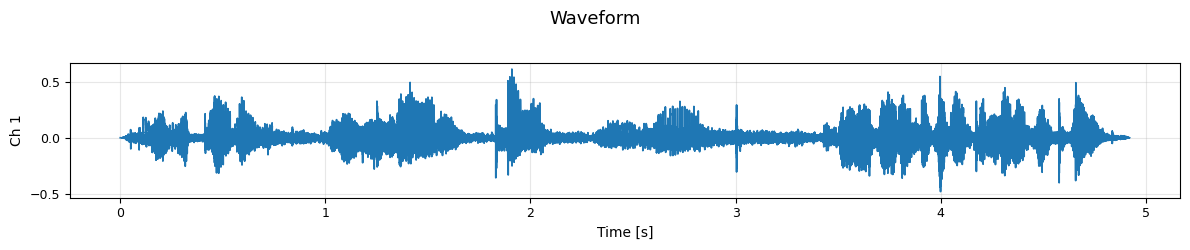

In [4]:
# Load an audio file
!mkdir -p tutorial_audio_files
!wget -O tutorial_audio_files/audio_48khz_mono_16bits.wav https://github.com/sensein/senselab/raw/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav

audio = Audio(filepath=os.path.abspath("tutorial_audio_files/audio_48khz_mono_16bits.wav"))

# Play the audio
play_audio(audio)
# Plot the log-mel-spectrogram
plot_waveform(audio)

We will now apply the `audiomentations` augmentation pipeline to the audio and visualize the changes.

<Figure size 640x480 with 0 Axes>

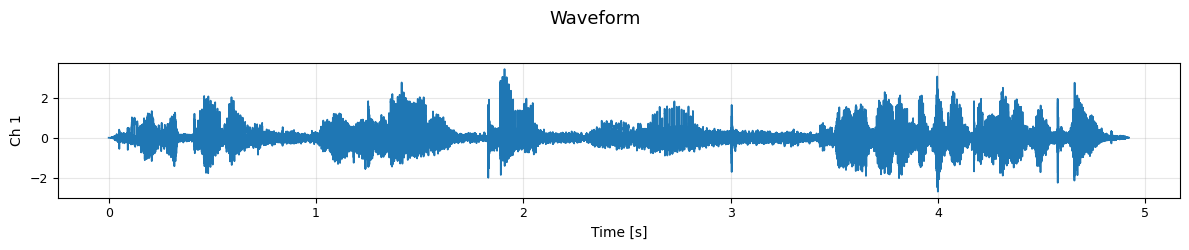

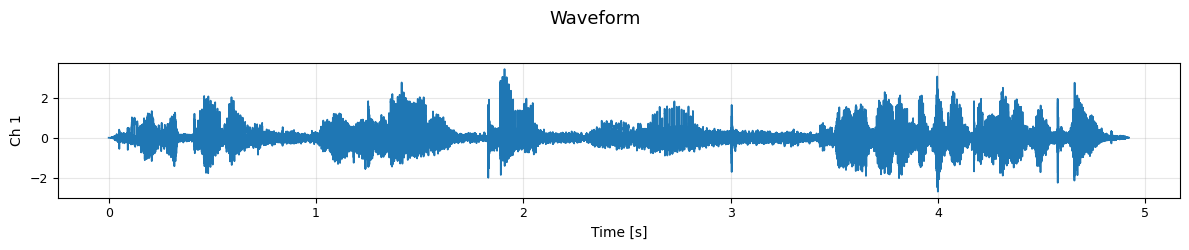

In [5]:
# Apply the augmentations using the wrapper
augmented_audios = augment_audios([audio, audio, audio], augment)
# Play the augmented audio
play_audio(augmented_audios[0])
# Plot the log-mel-spectrogram of the augmented audio
plot_waveform(augmented_audios[0])

Similarly, let's apply the augmentation using the `torch_audiomentations` library.

<Figure size 640x480 with 0 Axes>

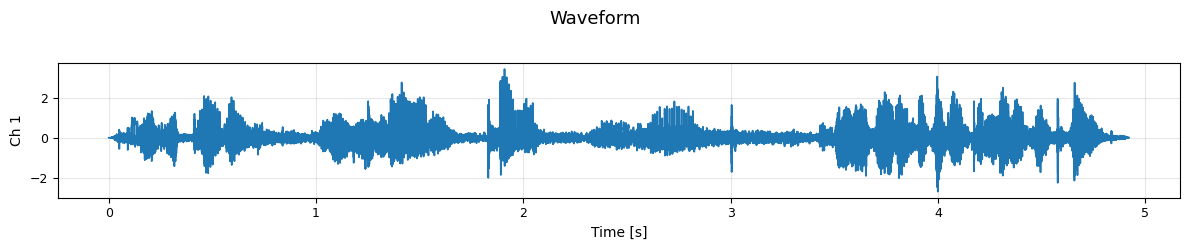

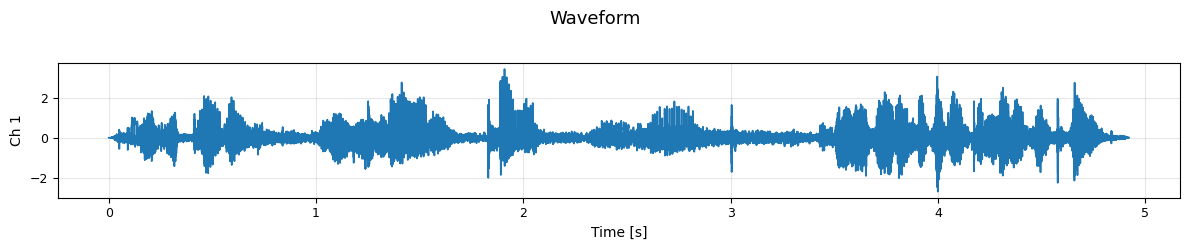

In [6]:
# Apply the augmentations using the wrapper with torch
torch_augmented_audios = augment_audios([audio], torch_augment)
# Play the audio augmented with torch
play_audio(torch_augmented_audios[0])
# Plot the log-mel-spectrogram of the audio augmented with torch
plot_waveform(torch_augmented_audios[0])